In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'affectnet-training-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2812806%2F4860972%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240819%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240819T145216Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79f5cf340b306f1e4bbf04a82f8e68d72cad695f3bbd7a1999732f1e952365828914788007e136c0ce0bd7f381d6944059f93a7a151a00b19b5ab06d6c91dacfe1e20cf4020177d8c50dd9d41f99c332bcfb09846309bba39cb58c54a4d08fe7e857748185f66c8f2cb96196c2bd53583360b66771b43eca855aa39492dfbbecbd253617f97c3c461fbf9083a2fc20b42615d21f69848b64ed3800de943510686dc0b03a5d5c1c50bf6aa9f3c7925c6d613d0c5153edbf57d87c20b84eb1f26d1b5162b77c73adec3b6f925963a63b73ae8c96123b26b89582f751c02d9e585032df20e268bd9a7814ebc48cf06d78c6542a72c2c3153b7c585c830866a06e22'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 329755345 bytes downloaded
Downloaded and uncompressed: affectnet-training-data
Data source import complete.


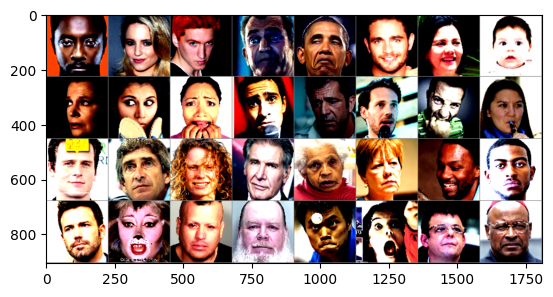

Experimenting with SGD and learning rate 0.01


Epoch 1/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 1/10, Loss: 1.6364, Train Accuracy: 0.3930


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.85batch/s]


Validation Loss: 1.1250, Validation Accuracy: 0.5884


Epoch 2/10: 100%|██████████| 727/727 [01:56<00:00,  6.26batch/s]


Epoch 2/10, Loss: 1.4263, Train Accuracy: 0.5008


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.65batch/s]


Validation Loss: 0.9875, Validation Accuracy: 0.6390


Epoch 3/10: 100%|██████████| 727/727 [01:55<00:00,  6.29batch/s]


Epoch 3/10, Loss: 1.3663, Train Accuracy: 0.5269


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.83batch/s]


Validation Loss: 0.9452, Validation Accuracy: 0.6616


Epoch 4/10: 100%|██████████| 727/727 [01:56<00:00,  6.25batch/s]


Epoch 4/10, Loss: 1.3270, Train Accuracy: 0.5455


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.19batch/s]


Validation Loss: 0.9157, Validation Accuracy: 0.6740


Epoch 5/10: 100%|██████████| 727/727 [01:55<00:00,  6.28batch/s]


Epoch 5/10, Loss: 1.2791, Train Accuracy: 0.5662


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.94batch/s]


Validation Loss: 0.8869, Validation Accuracy: 0.6808


Epoch 6/10: 100%|██████████| 727/727 [01:55<00:00,  6.27batch/s]


Epoch 6/10, Loss: 1.2669, Train Accuracy: 0.5751


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.17batch/s]


Validation Loss: 0.8629, Validation Accuracy: 0.6925


Epoch 7/10: 100%|██████████| 727/727 [01:56<00:00,  6.26batch/s]


Epoch 7/10, Loss: 1.2283, Train Accuracy: 0.5890


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.13batch/s]


Validation Loss: 0.8450, Validation Accuracy: 0.7056


Epoch 8/10: 100%|██████████| 727/727 [01:55<00:00,  6.30batch/s]


Epoch 8/10, Loss: 1.2037, Train Accuracy: 0.5985


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.19batch/s]


Validation Loss: 0.8472, Validation Accuracy: 0.6912


Epoch 9/10: 100%|██████████| 727/727 [01:56<00:00,  6.26batch/s]


Epoch 9/10, Loss: 1.1716, Train Accuracy: 0.6139


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.87batch/s]


Validation Loss: 0.8484, Validation Accuracy: 0.6987


Epoch 10/10: 100%|██████████| 727/727 [01:55<00:00,  6.29batch/s]


Epoch 10/10, Loss: 1.1489, Train Accuracy: 0.6262


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.29batch/s]


Validation Loss: 0.8727, Validation Accuracy: 0.6915
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.50      0.61      0.55       603
    contempt       0.65      0.71      0.68       593
     disgust       0.72      0.27      0.39       507
        fear       0.65      0.45      0.53       610
       happy       0.94      0.88      0.91       978
     neutral       0.87      0.90      0.88      1019
         sad       0.57      0.62      0.60       683
    surprise       0.56      0.76      0.64       816

    accuracy                           0.69      5809
   macro avg       0.68      0.65      0.65      5809
weighted avg       0.71      0.69      0.68      5809

Experimenting with Adam and learning rate 0.01


Epoch 1/10: 100%|██████████| 727/727 [01:57<00:00,  6.16batch/s]


Epoch 1/10, Loss: 1.4651, Train Accuracy: 0.4799


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.94batch/s]


Validation Loss: 0.9476, Validation Accuracy: 0.6671


Epoch 2/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 2/10, Loss: 1.3415, Train Accuracy: 0.5310


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.16batch/s]


Validation Loss: 0.9242, Validation Accuracy: 0.6755


Epoch 3/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 3/10, Loss: 1.2739, Train Accuracy: 0.5630


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.65batch/s]


Validation Loss: 0.9095, Validation Accuracy: 0.6734


Epoch 4/10: 100%|██████████| 727/727 [01:58<00:00,  6.15batch/s]


Epoch 4/10, Loss: 1.2201, Train Accuracy: 0.5840


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.99batch/s]


Validation Loss: 0.9723, Validation Accuracy: 0.6693


Epoch 5/10: 100%|██████████| 727/727 [01:58<00:00,  6.14batch/s]


Epoch 5/10, Loss: 1.1773, Train Accuracy: 0.6014


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.62batch/s]


Validation Loss: 0.9027, Validation Accuracy: 0.6827


Epoch 6/10: 100%|██████████| 727/727 [01:59<00:00,  6.11batch/s]


Epoch 6/10, Loss: 1.1158, Train Accuracy: 0.6291


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.33batch/s]


Validation Loss: 0.8813, Validation Accuracy: 0.6903


Epoch 7/10: 100%|██████████| 727/727 [02:00<00:00,  6.04batch/s]


Epoch 7/10, Loss: 1.0575, Train Accuracy: 0.6496


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.76batch/s]


Validation Loss: 0.8717, Validation Accuracy: 0.6993


Epoch 8/10: 100%|██████████| 727/727 [02:00<00:00,  6.03batch/s]


Epoch 8/10, Loss: 1.0158, Train Accuracy: 0.6689


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.31batch/s]


Validation Loss: 0.9238, Validation Accuracy: 0.6822


Epoch 9/10: 100%|██████████| 727/727 [01:58<00:00,  6.11batch/s]


Epoch 9/10, Loss: 0.9619, Train Accuracy: 0.6925


Validation: 100%|██████████| 182/182 [00:20<00:00,  9.02batch/s]


Validation Loss: 0.9627, Validation Accuracy: 0.6748


Epoch 10/10: 100%|██████████| 727/727 [01:59<00:00,  6.07batch/s]


Epoch 10/10, Loss: 0.9168, Train Accuracy: 0.7139


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.59batch/s]


Validation Loss: 0.9482, Validation Accuracy: 0.6833
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.46      0.63      0.53       603
    contempt       0.66      0.65      0.66       593
     disgust       0.46      0.59      0.52       507
        fear       0.60      0.42      0.50       610
       happy       0.93      0.91      0.92       978
     neutral       0.89      0.90      0.89      1019
         sad       0.62      0.48      0.55       683
    surprise       0.63      0.62      0.63       816

    accuracy                           0.68      5809
   macro avg       0.66      0.65      0.65      5809
weighted avg       0.69      0.68      0.68      5809

Experimenting with AdamW and learning rate 0.01


Epoch 1/10: 100%|██████████| 727/727 [01:58<00:00,  6.12batch/s]


Epoch 1/10, Loss: 1.4711, Train Accuracy: 0.4757


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.43batch/s]


Validation Loss: 1.0456, Validation Accuracy: 0.6285


Epoch 2/10: 100%|██████████| 727/727 [01:59<00:00,  6.09batch/s]


Epoch 2/10, Loss: 1.3355, Train Accuracy: 0.5315


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.90batch/s]


Validation Loss: 0.9891, Validation Accuracy: 0.6295


Epoch 3/10: 100%|██████████| 727/727 [02:00<00:00,  6.01batch/s]


Epoch 3/10, Loss: 1.2813, Train Accuracy: 0.5560


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.81batch/s]


Validation Loss: 0.8997, Validation Accuracy: 0.6810


Epoch 4/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 4/10, Loss: 1.2368, Train Accuracy: 0.5756


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.46batch/s]


Validation Loss: 0.9041, Validation Accuracy: 0.6758


Epoch 5/10: 100%|██████████| 727/727 [01:59<00:00,  6.07batch/s]


Epoch 5/10, Loss: 1.1907, Train Accuracy: 0.5981


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.57batch/s]


Validation Loss: 0.8912, Validation Accuracy: 0.6905


Epoch 6/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 6/10, Loss: 1.1240, Train Accuracy: 0.6235


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.06batch/s]


Validation Loss: 0.9185, Validation Accuracy: 0.6869


Epoch 7/10: 100%|██████████| 727/727 [01:59<00:00,  6.08batch/s]


Epoch 7/10, Loss: 1.0649, Train Accuracy: 0.6491


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.95batch/s]


Validation Loss: 0.8764, Validation Accuracy: 0.6846


Epoch 8/10: 100%|██████████| 727/727 [01:58<00:00,  6.11batch/s]


Epoch 8/10, Loss: 1.0264, Train Accuracy: 0.6672


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.63batch/s]


Validation Loss: 0.9109, Validation Accuracy: 0.6848


Epoch 9/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 9/10, Loss: 0.9593, Train Accuracy: 0.6929


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.41batch/s]


Validation Loss: 0.9551, Validation Accuracy: 0.6784


Epoch 10/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 10/10, Loss: 0.9171, Train Accuracy: 0.7104


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.74batch/s]


Validation Loss: 0.9360, Validation Accuracy: 0.6891
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.56      0.49      0.52       603
    contempt       0.60      0.75      0.67       593
     disgust       0.57      0.44      0.50       507
        fear       0.66      0.35      0.46       610
       happy       0.93      0.91      0.92       978
     neutral       0.88      0.90      0.89      1019
         sad       0.53      0.66      0.59       683
    surprise       0.58      0.69      0.63       816

    accuracy                           0.69      5809
   macro avg       0.66      0.65      0.65      5809
weighted avg       0.69      0.69      0.68      5809

Experimenting with RMSprop and learning rate 0.01


Epoch 1/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 1/10, Loss: 2.1193, Train Accuracy: 0.1890


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.61batch/s]


Validation Loss: 3.7851, Validation Accuracy: 0.2541


Epoch 2/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 2/10, Loss: 1.7587, Train Accuracy: 0.3000


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.12batch/s]


Validation Loss: 2.2872, Validation Accuracy: 0.3589


Epoch 3/10: 100%|██████████| 727/727 [01:57<00:00,  6.18batch/s]


Epoch 3/10, Loss: 1.6679, Train Accuracy: 0.3697


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.90batch/s]


Validation Loss: 1.4466, Validation Accuracy: 0.4168


Epoch 4/10: 100%|██████████| 727/727 [01:56<00:00,  6.22batch/s]


Epoch 4/10, Loss: 1.6023, Train Accuracy: 0.4030


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.79batch/s]


Validation Loss: 1.3251, Validation Accuracy: 0.4930


Epoch 5/10: 100%|██████████| 727/727 [01:57<00:00,  6.19batch/s]


Epoch 5/10, Loss: 1.5138, Train Accuracy: 0.4423


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.02batch/s]


Validation Loss: 1.2136, Validation Accuracy: 0.5392


Epoch 6/10: 100%|██████████| 727/727 [01:56<00:00,  6.25batch/s]


Epoch 6/10, Loss: 1.4547, Train Accuracy: 0.4736


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.64batch/s]


Validation Loss: 1.1753, Validation Accuracy: 0.5579


Epoch 7/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 7/10, Loss: 1.4181, Train Accuracy: 0.4871


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.16batch/s]


Validation Loss: 1.0950, Validation Accuracy: 0.5894


Epoch 8/10: 100%|██████████| 727/727 [01:57<00:00,  6.21batch/s]


Epoch 8/10, Loss: 1.3827, Train Accuracy: 0.5054


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.34batch/s]


Validation Loss: 1.0802, Validation Accuracy: 0.6087


Epoch 9/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 9/10, Loss: 1.3436, Train Accuracy: 0.5257


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.12batch/s]


Validation Loss: 1.0447, Validation Accuracy: 0.6208


Epoch 10/10: 100%|██████████| 727/727 [01:57<00:00,  6.20batch/s]


Epoch 10/10, Loss: 1.3084, Train Accuracy: 0.5404


Validation: 100%|██████████| 182/182 [00:19<00:00,  9.42batch/s]


Validation Loss: 1.0412, Validation Accuracy: 0.6158
Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.46      0.60      0.52       603
    contempt       0.57      0.59      0.58       593
     disgust       0.51      0.24      0.33       507
        fear       0.43      0.57      0.49       610
       happy       0.87      0.92      0.89       978
     neutral       0.86      0.85      0.85      1019
         sad       0.58      0.25      0.34       683
    surprise       0.46      0.58      0.51       816

    accuracy                           0.62      5809
   macro avg       0.59      0.57      0.56      5809
weighted avg       0.62      0.62      0.60      5809

Plotting for optimizer=SGD, lr=0.01


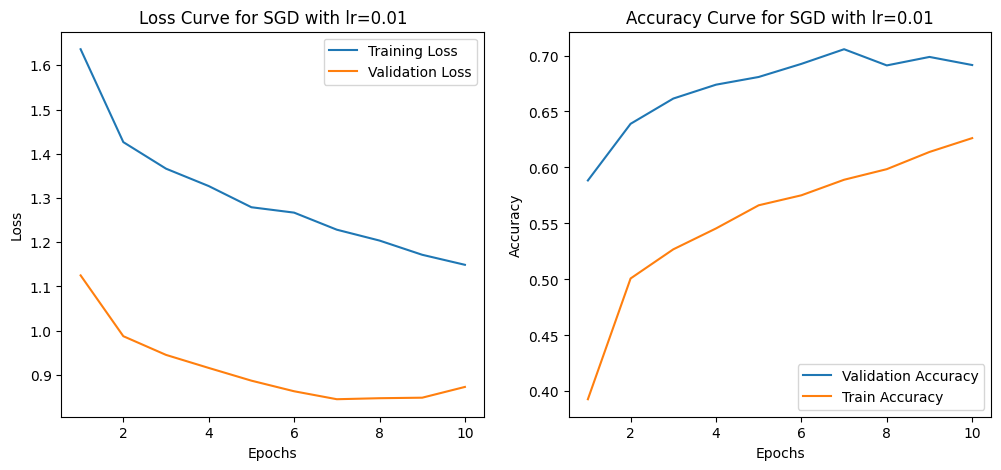

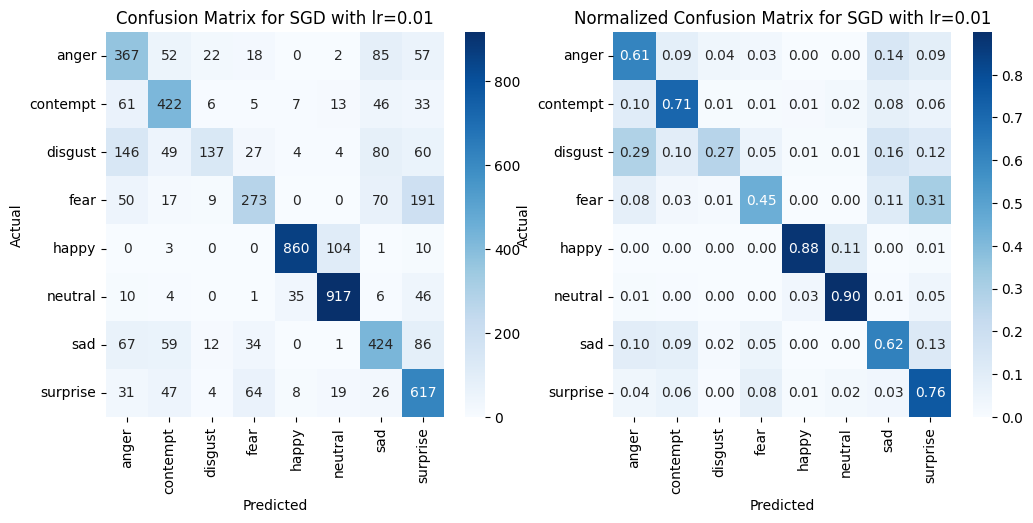

Plotting for optimizer=Adam, lr=0.01


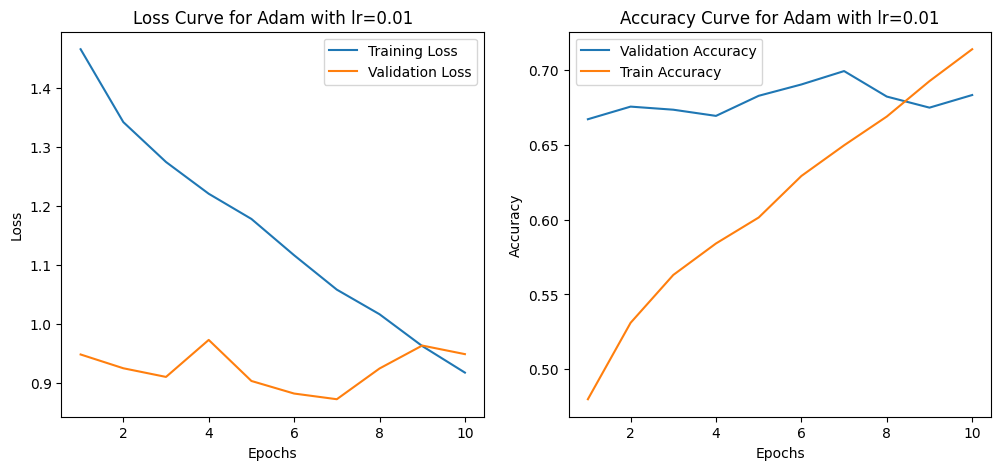

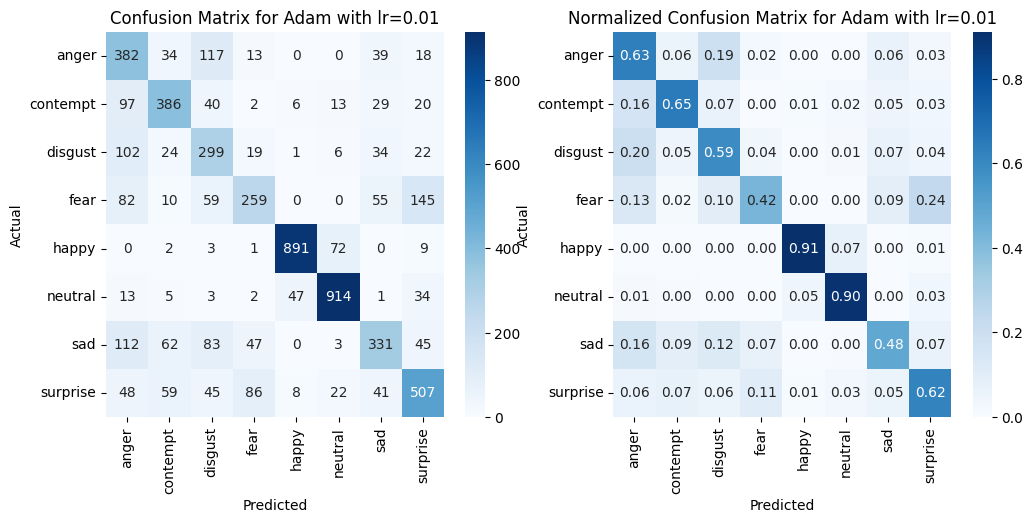

Plotting for optimizer=AdamW, lr=0.01


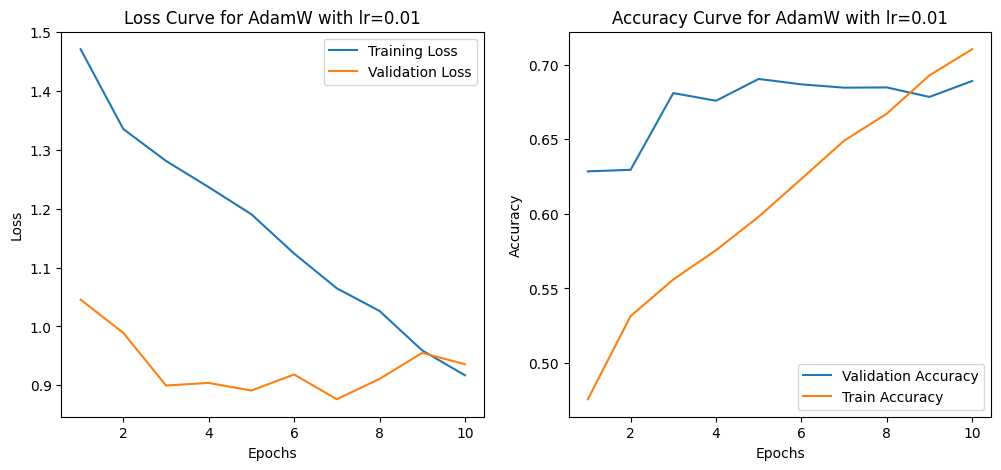

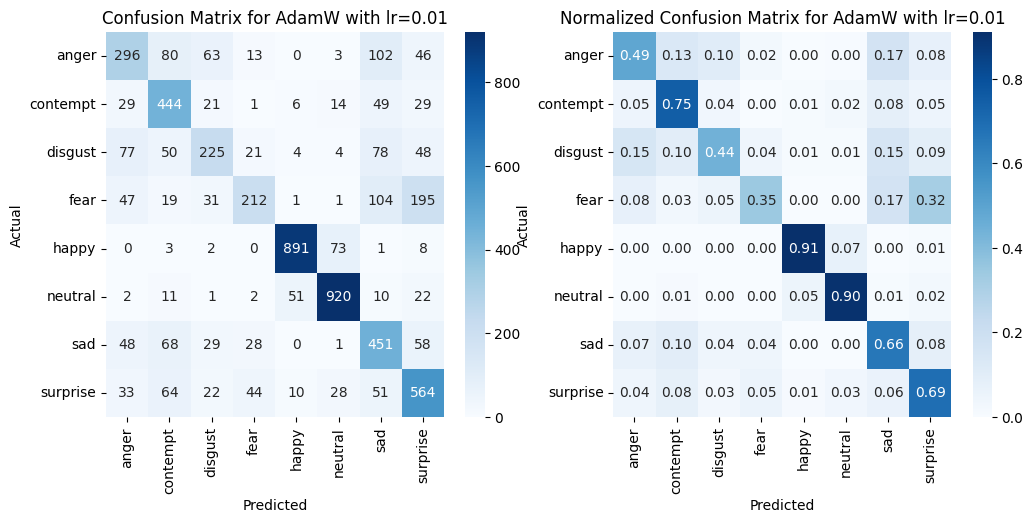

Plotting for optimizer=RMSprop, lr=0.01


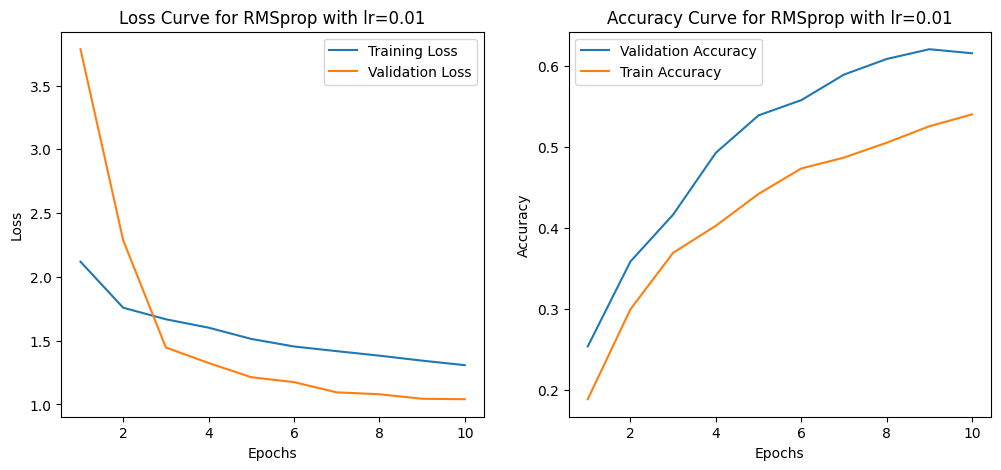

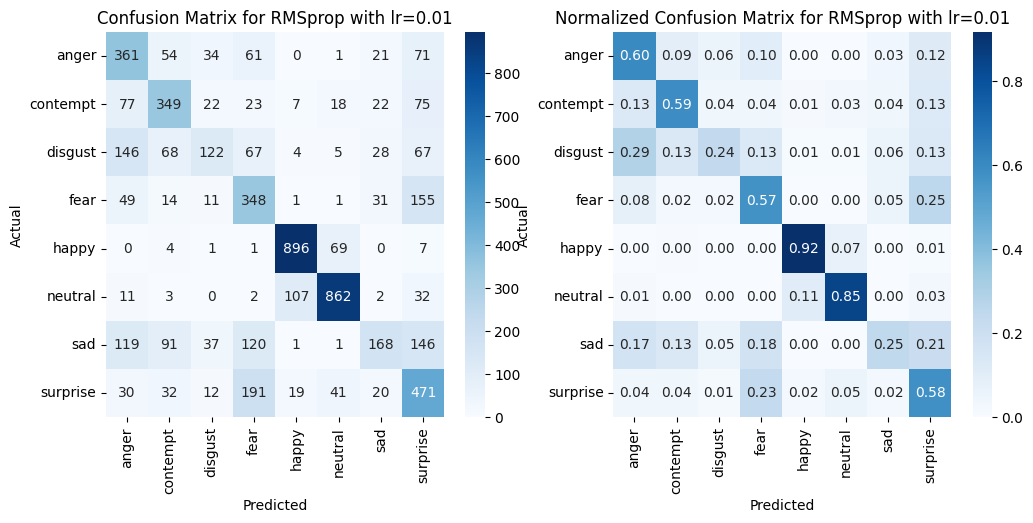

In [5]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torchvision.utils import make_grid
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# To Load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Defining Dynamic Augmentation Class
class DynamicAugmenter:
    def __init__(self):
        self.transformations = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.5, contrast=0.5),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomAffine(degrees=20, translate=(0.1, 0.1)),
            transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
        ]
        self.current_transforms = []

    def update_augmentation(self, val_accuracy):
        if val_accuracy < 0.6:
            self.current_transforms = random.sample(self.transformations, k=5)
        else:
            self.current_transforms = random.sample(self.transformations, k=3)

    def __call__(self, img):
        transform = transforms.Compose(self.current_transforms + [transforms.ToTensor()])
        return transform(img)

# Applying Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading dataset
base_dir = '/kaggle/input/affectnet-training-data'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# To display some images
data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5  # Unnormalized form
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(make_grid(images))

# Experimenting with different optimizers and learning rates
optimizers = ['SGD', 'Adam', 'AdamW', 'RMSprop']
learning_rates = [0.01] #[0.0001, 0.001, 0.01]
num_epochs = 10

all_results = {}

for lr in learning_rates:
    for optimizer_class_name in optimizers:
        print(f'Experimenting with {optimizer_class_name} and learning rate {lr}')

        # Defining the Model
        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        model.fc = nn.Linear(model.fc.in_features, 8)
        model.to(device)

        # Loss
        criterion = nn.CrossEntropyLoss()

        # Optimizer
        if optimizer_class_name == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
        elif optimizer_class_name == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr)
        elif optimizer_class_name == 'AdamW':
            optimizer = optim.AdamW(model.parameters(), lr=lr)
        elif optimizer_class_name == 'RMSprop':
            optimizer = optim.RMSprop(model.parameters(), lr=lr)

        # Scheduler
        scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=lr, steps_per_epoch=len(train_loader), epochs=num_epochs)

        # Mixup functions
        def mixup_data(x, y, alpha=1.0):
            if alpha > 0:
                lam = np.random.beta(alpha, alpha)
            else:
                lam = 1
            batch_size = x.size()[0]
            index = torch.randperm(batch_size).to(device)
            mixed_x = lam * x + (1 - lam) * x[index, :]
            y_a, y_b = y, y[index]
            return mixed_x, y_a, y_b, lam

        def mixup_criterion(criterion, pred, y_a, y_b, lam):
            return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

        # Initializing lists to store loss and accuracy values
        train_losses = []
        val_losses = []
        train_accuracies = []
        val_accuracies = []

        augmenter = DynamicAugmenter()

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0
            correct = 0
            total = 0

            for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
                images, labels = images.to(device), labels.to(device)

                # Applying Mixup
                images, labels_a, labels_b, lam = mixup_data(images, labels, alpha=1.0)

                optimizer.zero_grad()

                outputs = model(images)
                loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)

                loss.backward()
                optimizer.step()

                running_loss += loss.item() * images.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (lam * (predicted == labels_a).sum().item() + (1 - lam) * (predicted == labels_b).sum().item())

            epoch_loss = running_loss / len(train_loader.dataset)
            train_accuracy = correct / total
            train_losses.append(epoch_loss)
            train_accuracies.append(train_accuracy)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

            # Evaluating the Validation set
            model.eval()
            val_running_loss = 0.0
            correct = 0
            total = 0

            with torch.no_grad():
                for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    val_running_loss += loss.item() * images.size(0)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            val_loss = val_running_loss / len(val_loader.dataset)
            val_accuracy = correct / total
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

            # Updating dynamic augmenter based on validation accuracy
            augmenter.update_augmentation(val_accuracy)

            # Adjusting learning rate with scheduler
            scheduler.step()

        # Saving the model
        model_path = f'resnet18_affectnet_{optimizer_class_name}_lr{lr}.pth'
        torch.save(model.state_dict(), model_path)

        # Evaluating the model on validation set
        model.eval()
        all_labels = []
        all_preds = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)

                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(predicted.cpu().numpy())

        all_labels = np.array(all_labels)
        all_preds = np.array(all_preds)

        # Classification Report
        report = classification_report(all_labels, all_preds, target_names=dataset.classes)
        print("Classification Report for Validation Set:")
        print(report)

        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)

        # Calculating test/val loss and accuracy
        test_loss = val_losses[-1]
        test_accuracy = val_accuracies[-1]

        # Storing the results
        all_results[(lr, optimizer_class_name)] = {
            'train_losses': train_losses,
            'val_losses': val_losses,
            'train_accuracies': train_accuracies,
            'val_accuracies': val_accuracies,
            'test_loss': test_loss,
            'test_accuracy': test_accuracy,
            'y_true': all_labels,
            'y_pred': all_preds
        }

# Plotting the results
for key, result in all_results.items():
    lr, opt = key
    print(f'Plotting for optimizer={opt}, lr={lr}')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), result['train_losses'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), result['val_losses'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve for {opt} with lr={lr}')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), result['val_accuracies'], label='Validation Accuracy')
    plt.plot(range(1, num_epochs + 1), result['train_accuracies'], label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy Curve for {opt} with lr={lr}')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(result['y_true'], result['y_pred'])

    # Plotting non-normalized confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plotting normalized confusion matrix
    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Normalized Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

Plotting for optimizer=SGD, lr=0.001


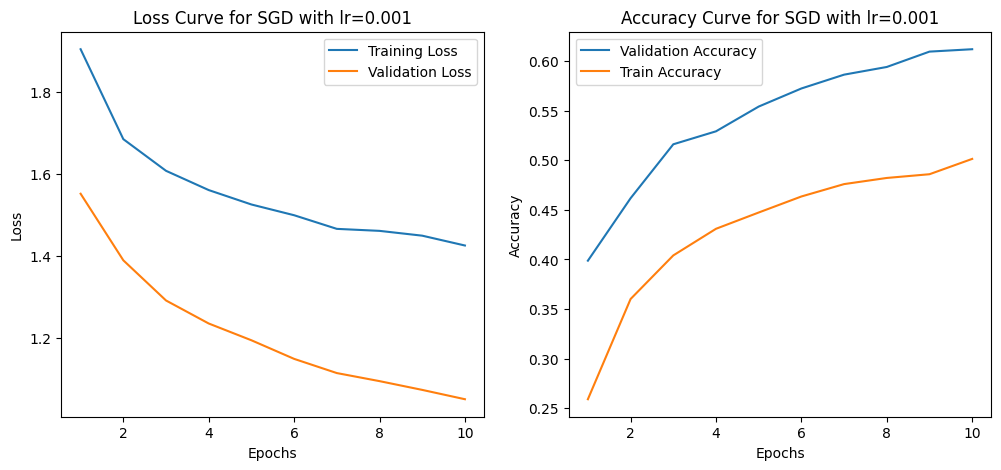

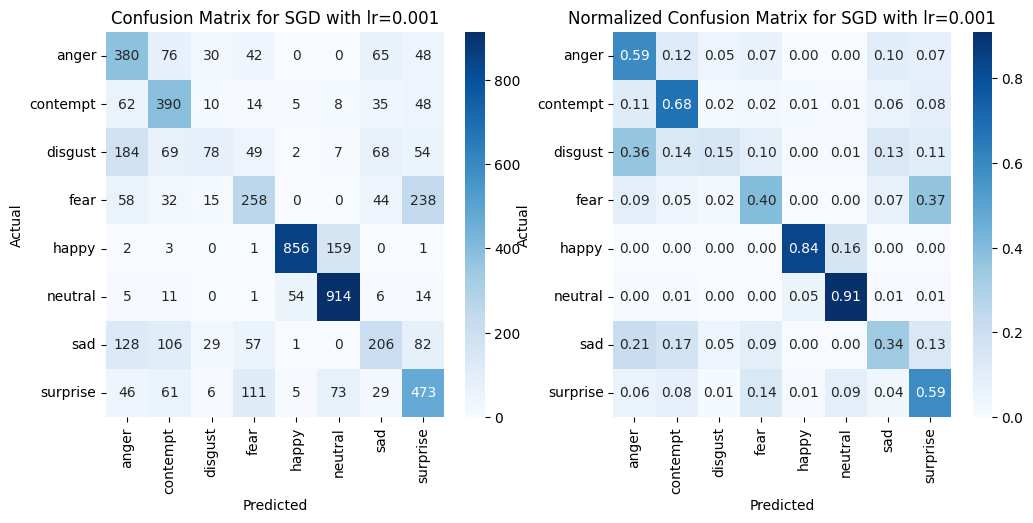

Plotting for optimizer=Adam, lr=0.001


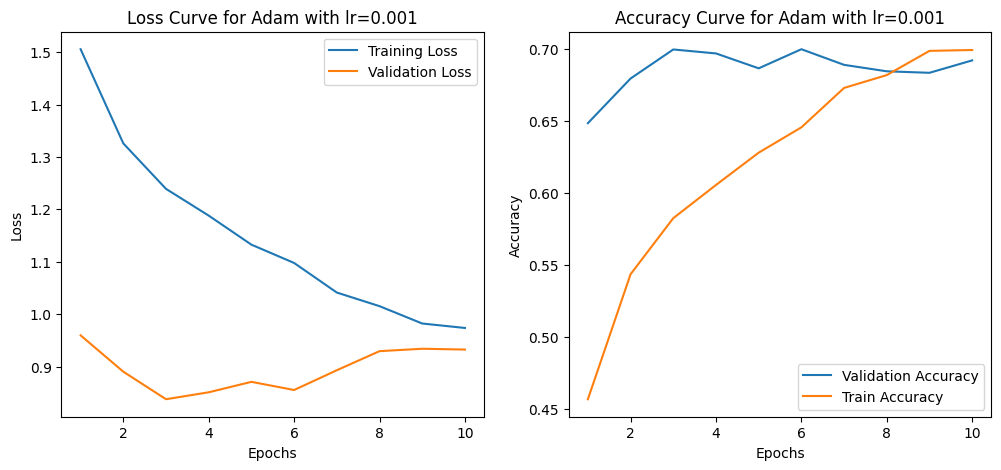

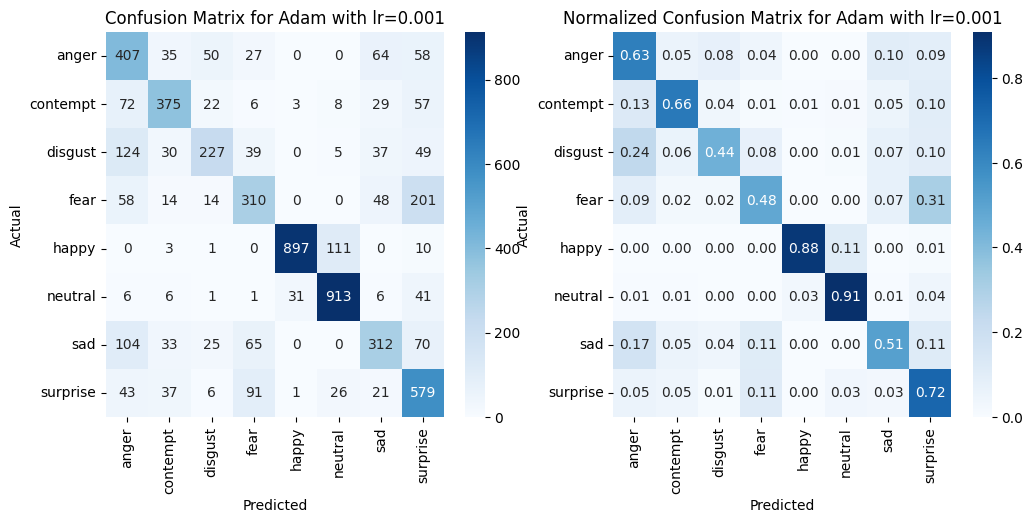

Plotting for optimizer=AdamW, lr=0.001


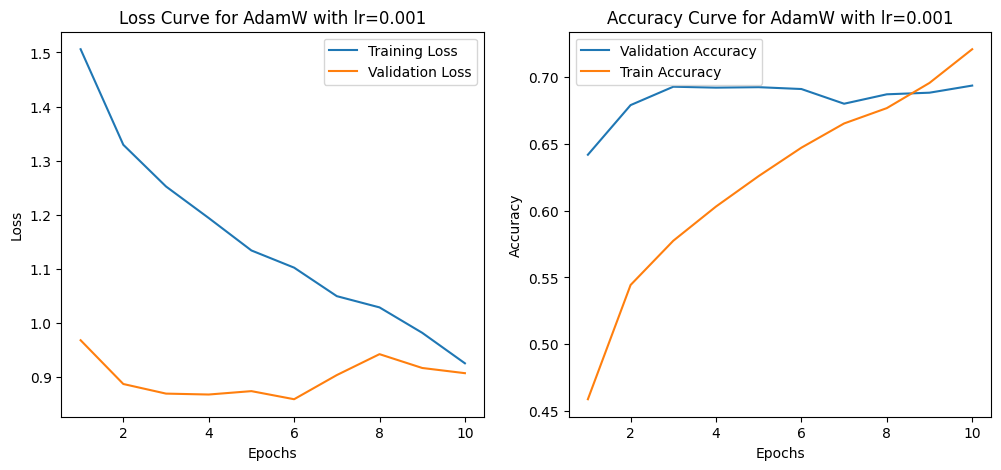

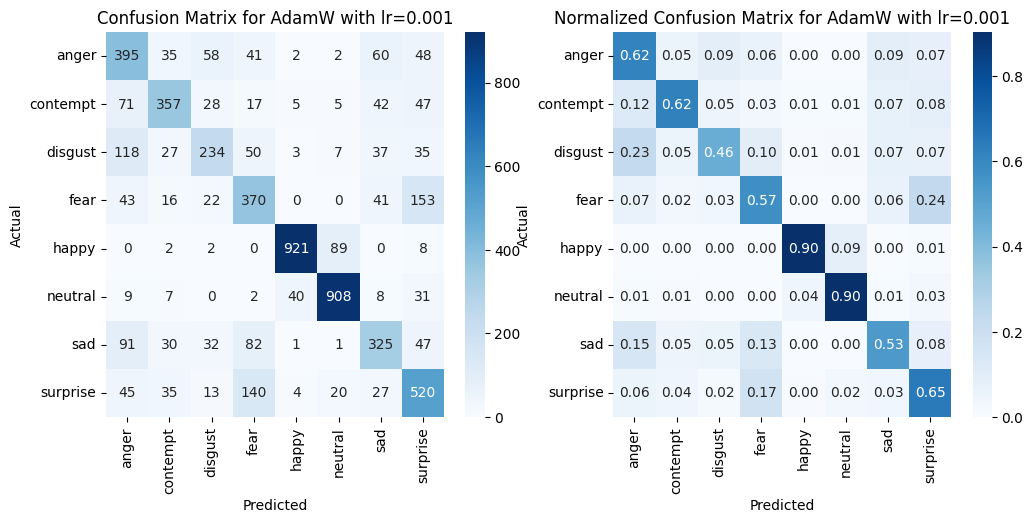

Plotting for optimizer=RMSprop, lr=0.001


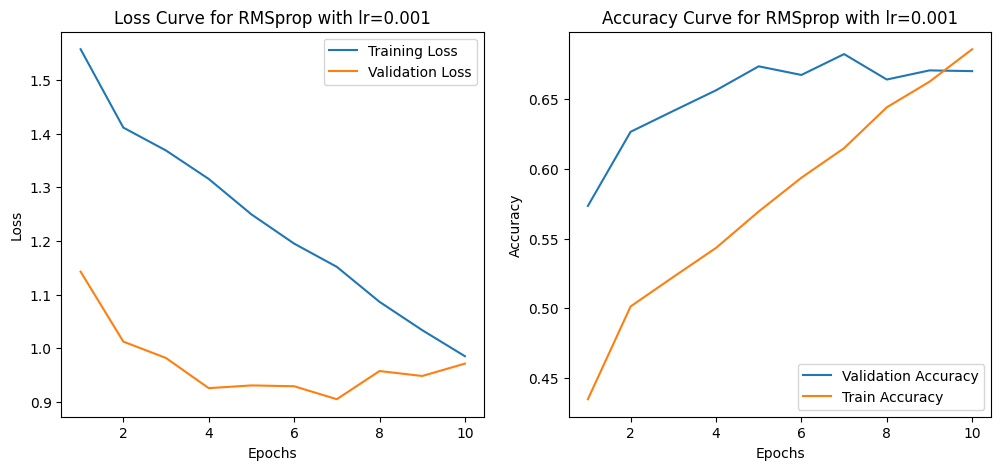

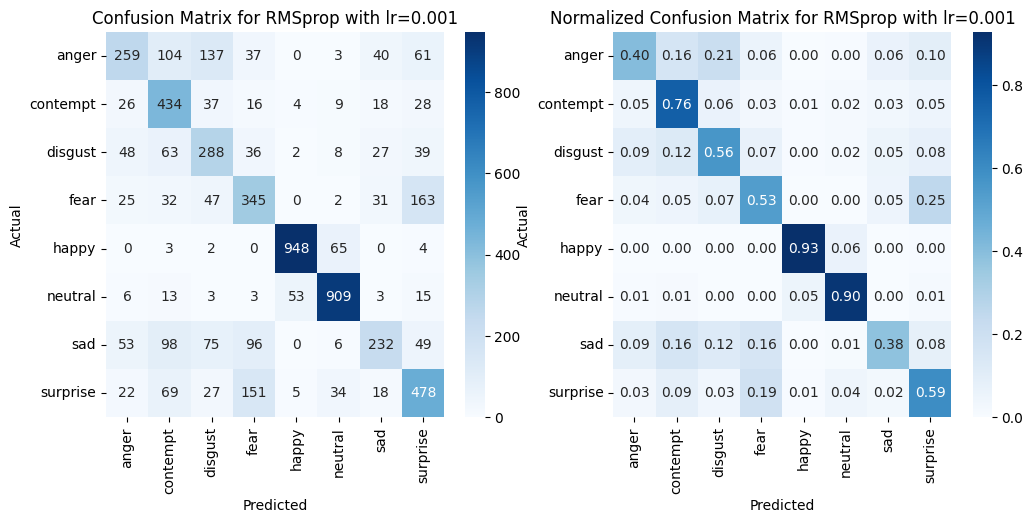

In [4]:
# Plot results
for key, result in all_results.items():
    lr, opt = key
    print(f'Plotting for optimizer={opt}, lr={lr}')
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), result['train_losses'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), result['val_losses'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curve for {opt} with lr={lr}')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), result['val_accuracies'], label='Validation Accuracy')
    plt.plot(range(1, num_epochs + 1), result['train_accuracies'], label='Train Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy Curve for {opt} with lr={lr}')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(result['y_true'], result['y_pred'])

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Plot normalized confusion matrix
    plt.subplot(1, 2, 2)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
    plt.title(f'Normalized Confusion Matrix for {opt} with lr={lr}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    plt.show()

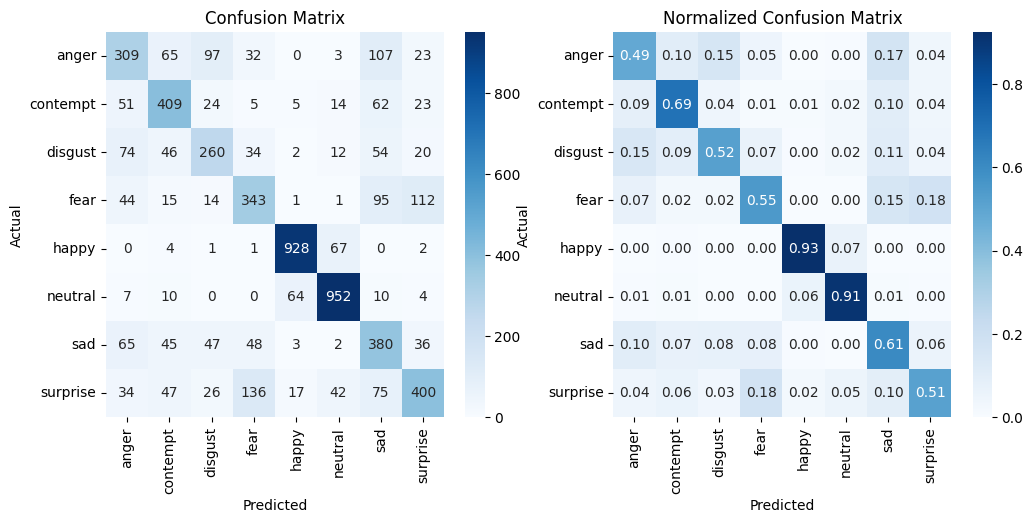

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm,cmap='Blues', fmt='d',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plot Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized,cmap='Blues', fmt='.2f',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
